In [1]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

#Music processing with Librosa
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
general_path = 'C:\\Users\\sezgi\\Documents\\MusicGenreClassification\\Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [4]:
# Analyze one sample
y, sr = librosa.load(f'{general_path}/genres_original/pop/pop.00010.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

#Calculate length of the audio
audio_length = len(y) / sr
print(f'Audio Length (seconds): {audio_length}')


y: [-0.06268311 -0.07568359 -0.08706665 ...  0.02651978  0.00140381
 -0.01583862] 

y shape: (661504,) 

Sample Rate (KHz): 22050 

Audio Length (seconds): 30.00018140589569


In [5]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')
print('Audio File shape:', np.shape(audio_file))

Audio File: [-0.06268311 -0.07568359 -0.08706665 ...  0.02651978  0.00140381
 -0.01583862] 

Audio File shape: (661504,)


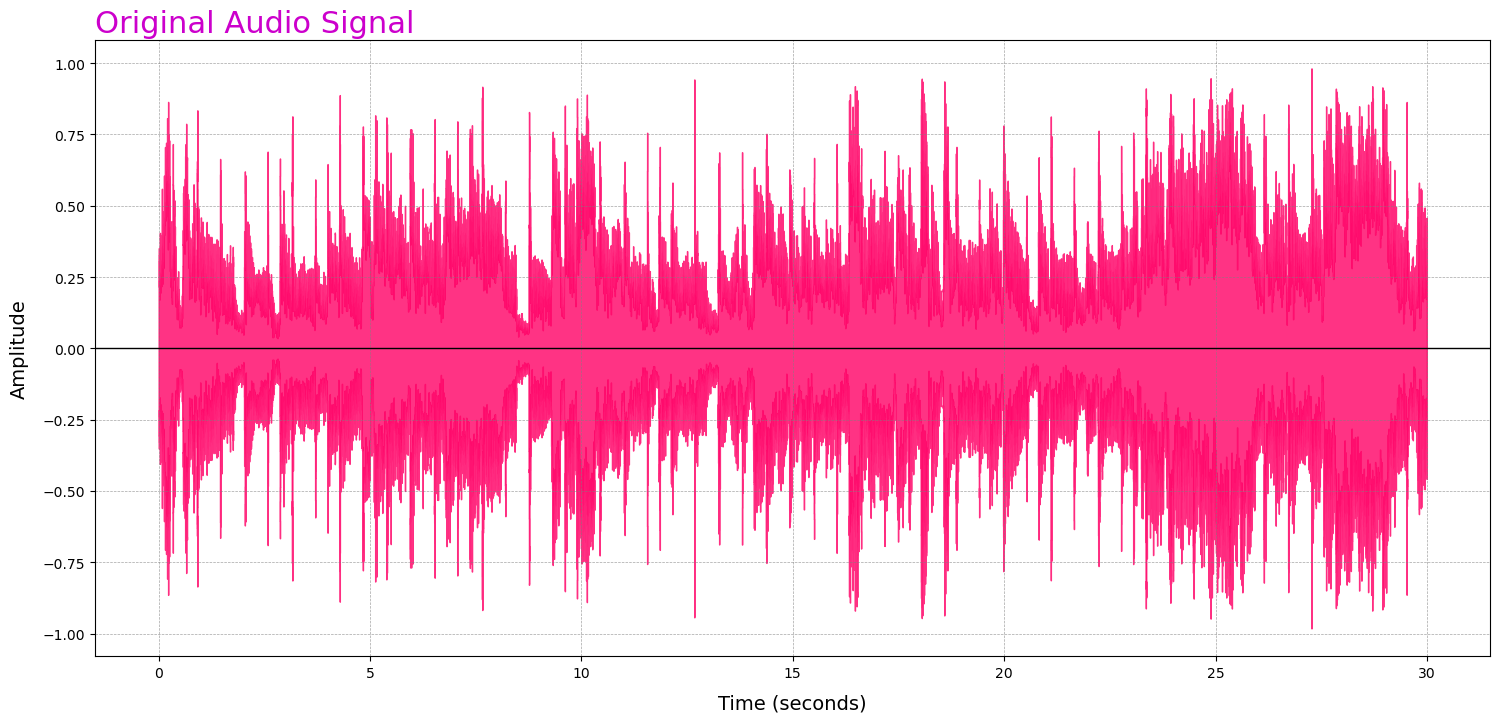

In [24]:
#Show audio signal 
plt.figure(figsize=(18, 8))
librosa.display.waveshow(y=audio_file, sr=sr, color="#FF0066", alpha=0.8)
plt.title("Original Audio Signal", fontsize=22, color="#cc00cc", loc="left")
plt.xlabel("Time (seconds)", fontsize=14, labelpad=10)
plt.ylabel("Amplitude", fontsize=14, labelpad=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.axhline(0, color="black", linewidth=1)
plt.show()

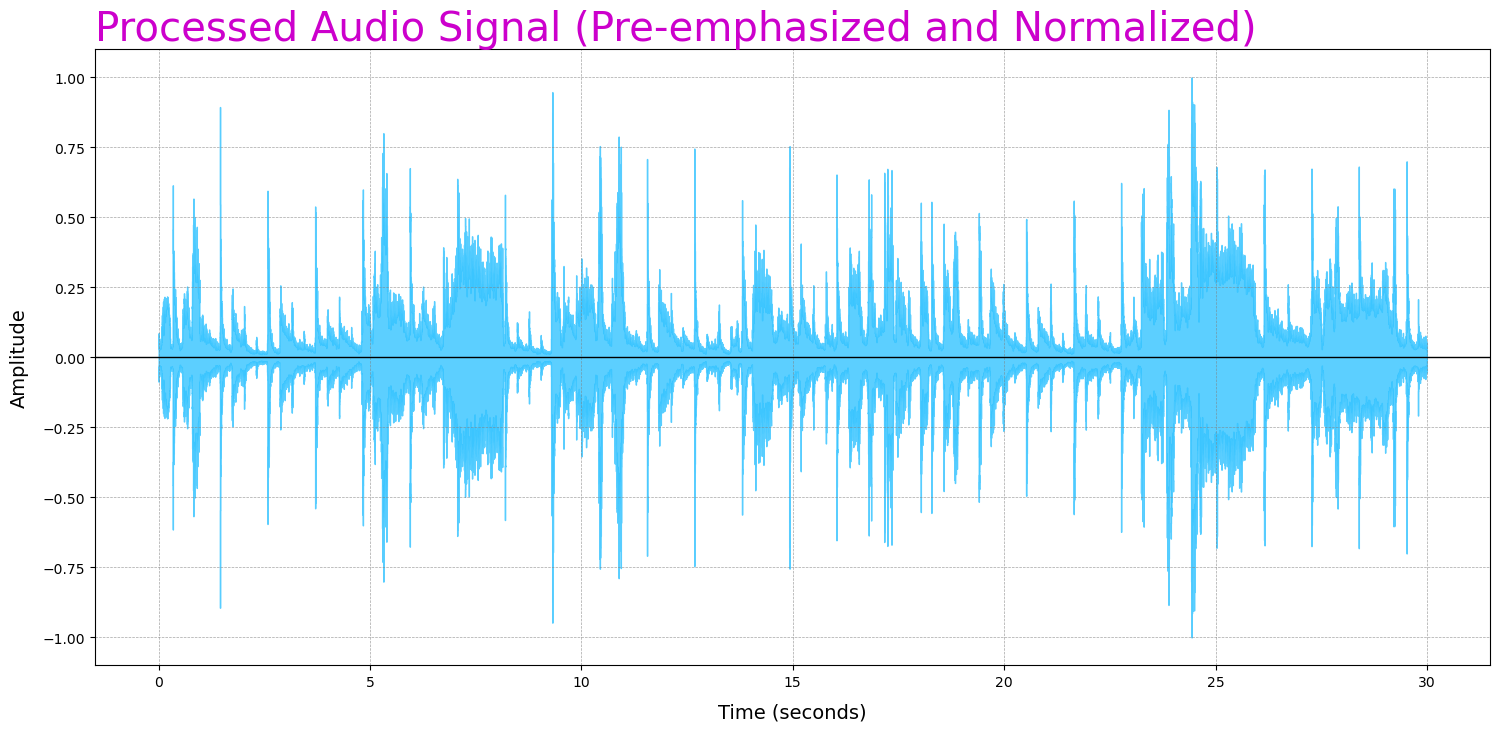

In [27]:
# Apply Pre-emphasis (High-pass filter) for signal conditioning
# Pre-emphasis filter - emphasizing high-frequency components
plt.figure(figsize=(18, 8))
def pre_emphasis(y, coeff=0.97):
    return np.append(y[0], y[1:] - coeff * y[:-1])

y_preemph = pre_emphasis(audio_file)

# Normalize the audio signal
y_norm = librosa.util.normalize(y_preemph)
librosa.display.waveshow(y=y_norm, sr=sr, color="#33C3FF", alpha=0.8)
plt.title("Processed Audio Signal (Pre-emphasized and Normalized)", fontsize=29, color="#cc00cc", loc="left")
plt.xlabel("Time (seconds)", fontsize=14, labelpad=10)
plt.ylabel("Amplitude", fontsize=14, labelpad=10)
plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)
plt.axhline(0, color="black", linewidth=1)
plt.show()



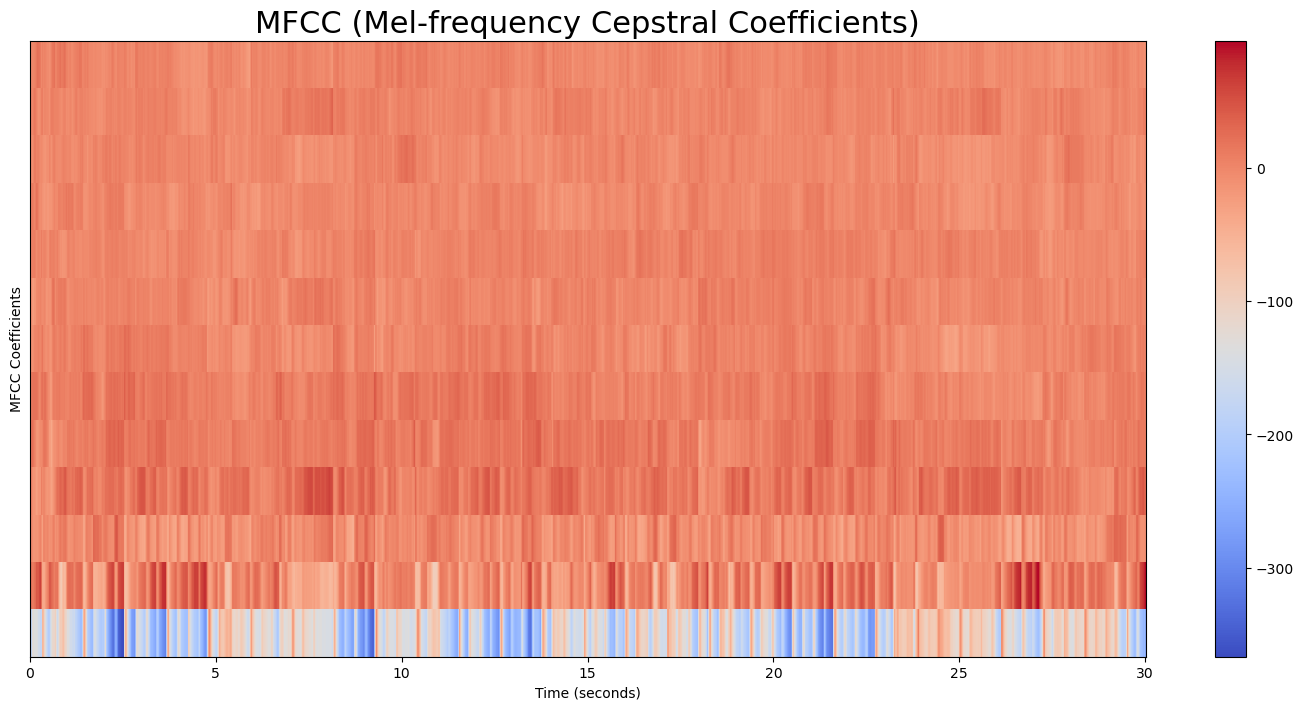

In [28]:
# Extracting MFCC (Mel-frequency cepstral coefficients) for further processing
mfcc = librosa.feature.mfcc(y=y_norm, sr=sr, n_mfcc=13)

# Plotting MFCC
plt.figure(figsize=(18, 8))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC (Mel-frequency Cepstral Coefficients)', fontsize=22)
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.show()

Mean: 1.8155499e-09 

Var: 1.0


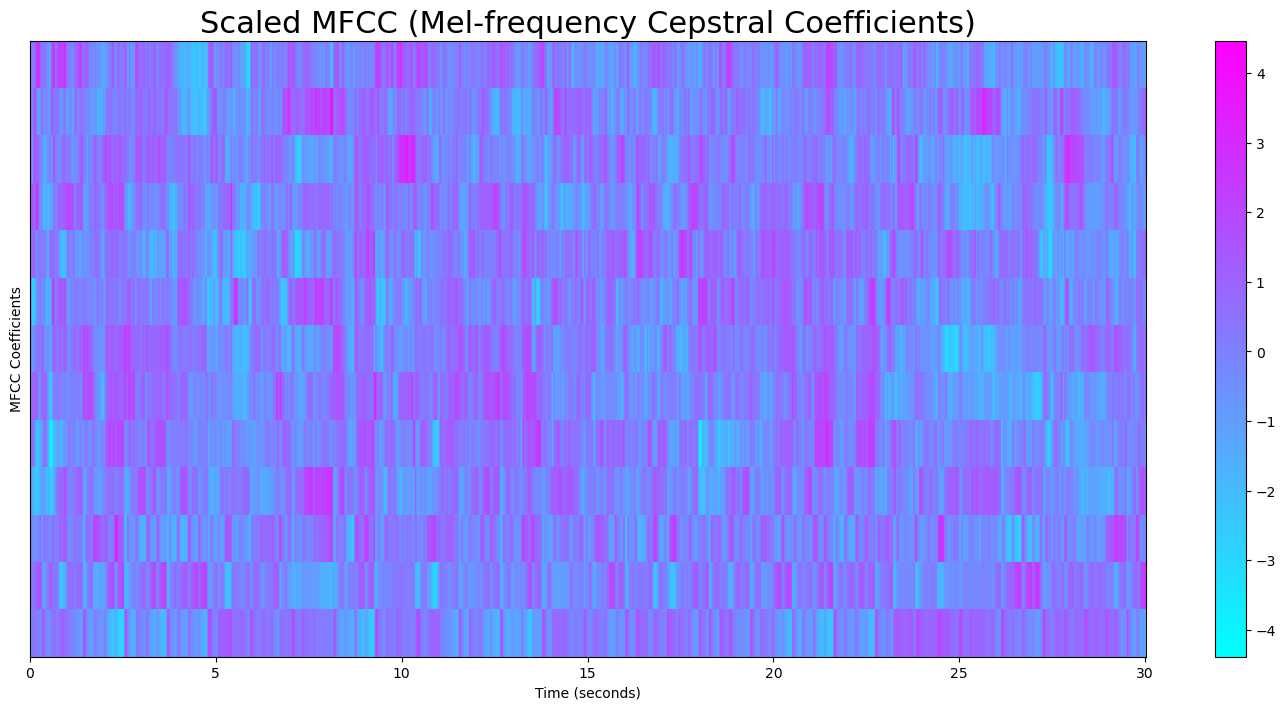

In [32]:
# Perform Feature Scaling
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)  # Scaling each MFCC feature across time
print('Mean:', mfcc.mean(), '\n')
print('Var:', mfcc.var())

# Plotting the scaled MFCC
plt.figure(figsize=(18, 8))
librosa.display.specshow(mfcc, sr=sr, x_axis='time', cmap='cool')
plt.colorbar()
plt.title('Scaled MFCC (Mel-frequency Cepstral Coefficients)', fontsize=22)
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.show()


Why Use a Log-Scale Spectrogram?
A logarithmic scale is used because human perception of frequency is logarithmic—meaning we perceive changes in frequency in a non-linear fashion, especially at higher frequencies.
This scaling makes it easier to see lower frequencies (which are more important in many audio processing tasks) while still keeping the high-frequency details visible.

Shape of D object: (1025, 1293)


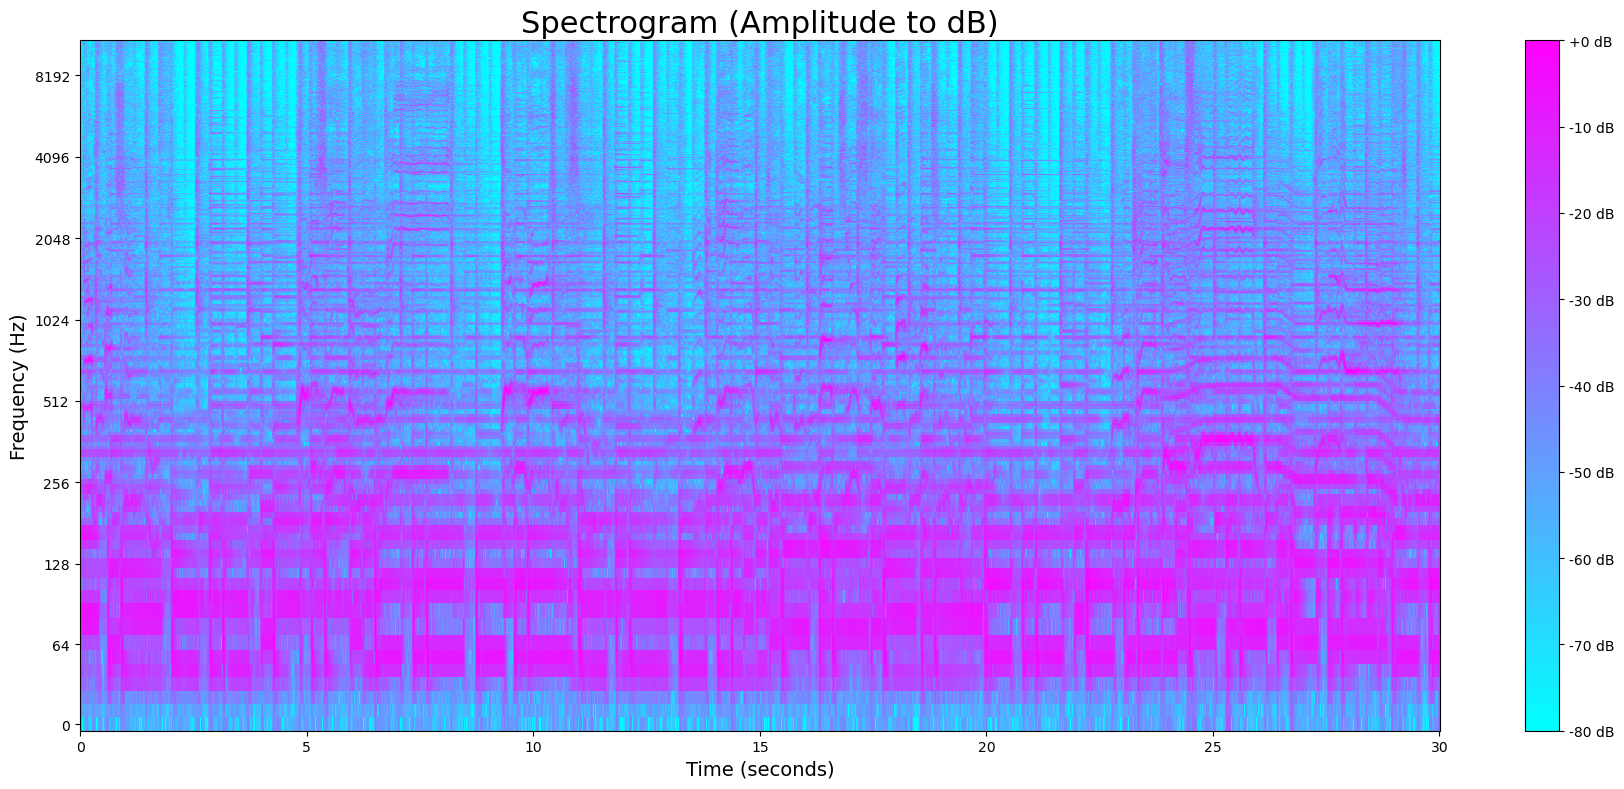

In [38]:
# Default FFT window size
n_fft = 2048  # FFT window size
hop_length = 512  # Number of audio frames between STFT columns

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft=n_fft, hop_length=hop_length))

# Print the shape of the spectrogram matrix
print('Shape of D object:', np.shape(D))

# Convert amplitude spectrogram to Decibels (dB)
DB = librosa.amplitude_to_db(D, ref=np.max)

# Plot the Spectrogram (Decibels)
plt.figure(figsize=(18, 8))
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log', cmap='cool')

# Add a color bar to visualize the dB values
plt.colorbar(format='%+2.0f dB')

# Add titles and labels
plt.title('Spectrogram (Amplitude to dB)', fontsize=22)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Frequency (Hz)', fontsize=14)

plt.tight_layout()
plt.show()

Chromogram shape: (12, 1293)


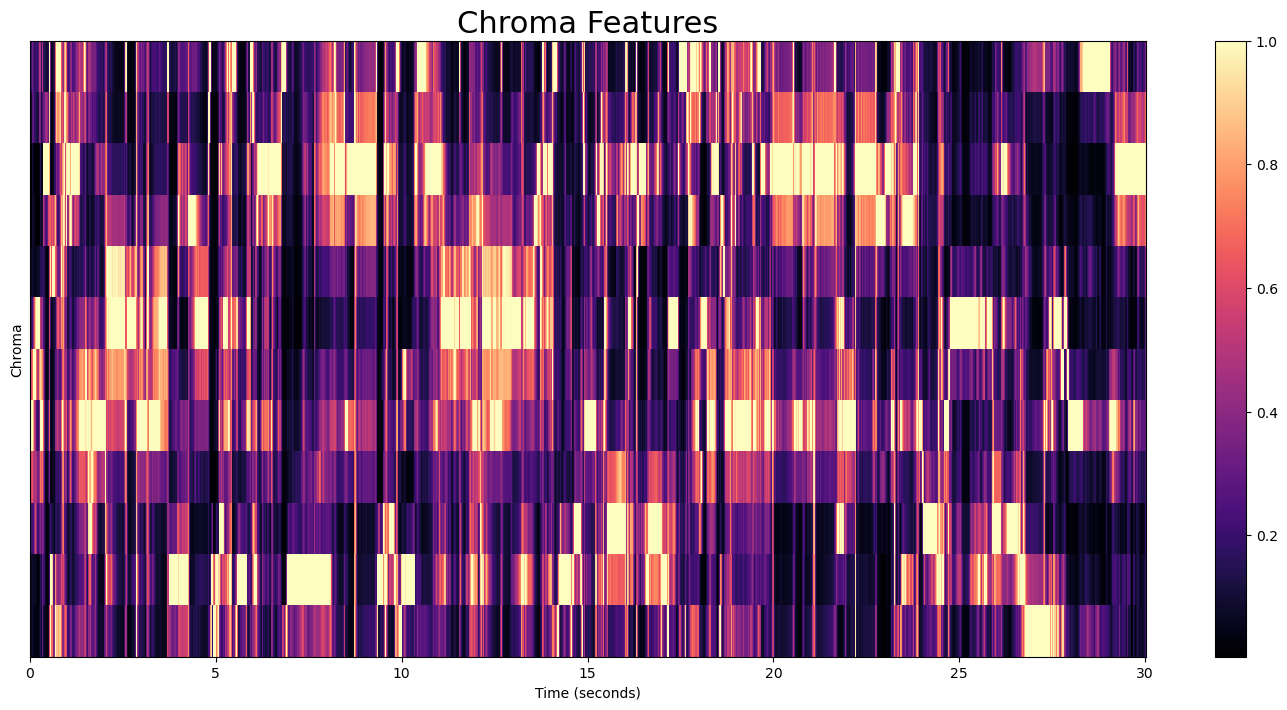

In [46]:
# Chromogram
chroma = librosa.feature.chroma_stft(y=audio_file, sr=sr, n_chroma=12)
print('Chromogram shape:', chroma.shape)
# Plotting Chroma Features
plt.figure(figsize=(18,8))
librosa.display.specshow(chroma, x_axis='time', sr=sr)
plt.colorbar()
plt.title('Chroma Features', fontsize=22)
plt.xlabel("Time (seconds)")
plt.ylabel("Chroma")
plt.show()

In [47]:
#EDA
data = pd.read_csv('features_30_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


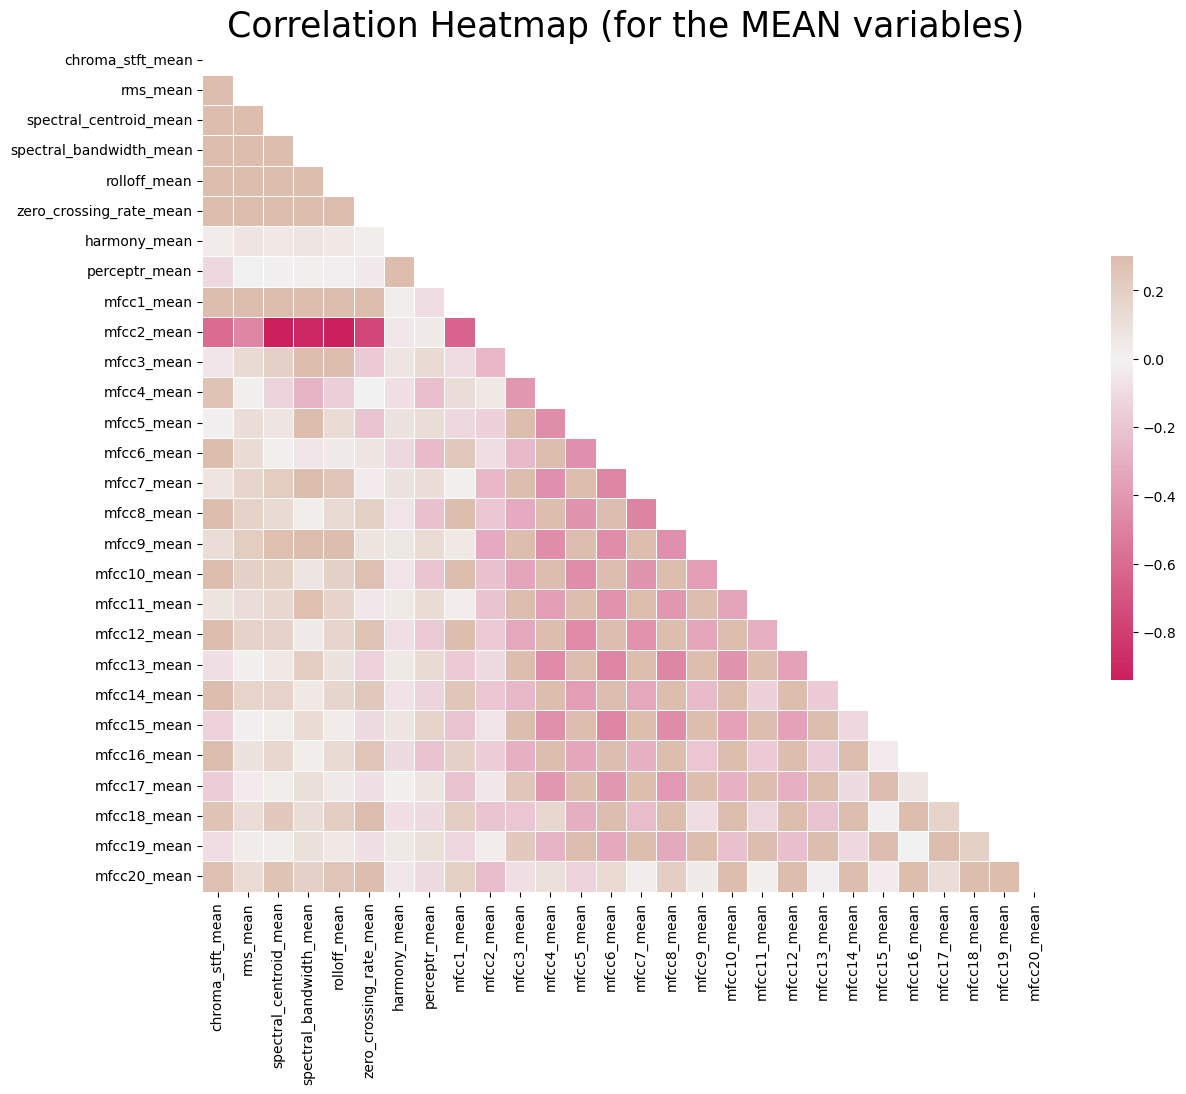

In [51]:
#Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.show()

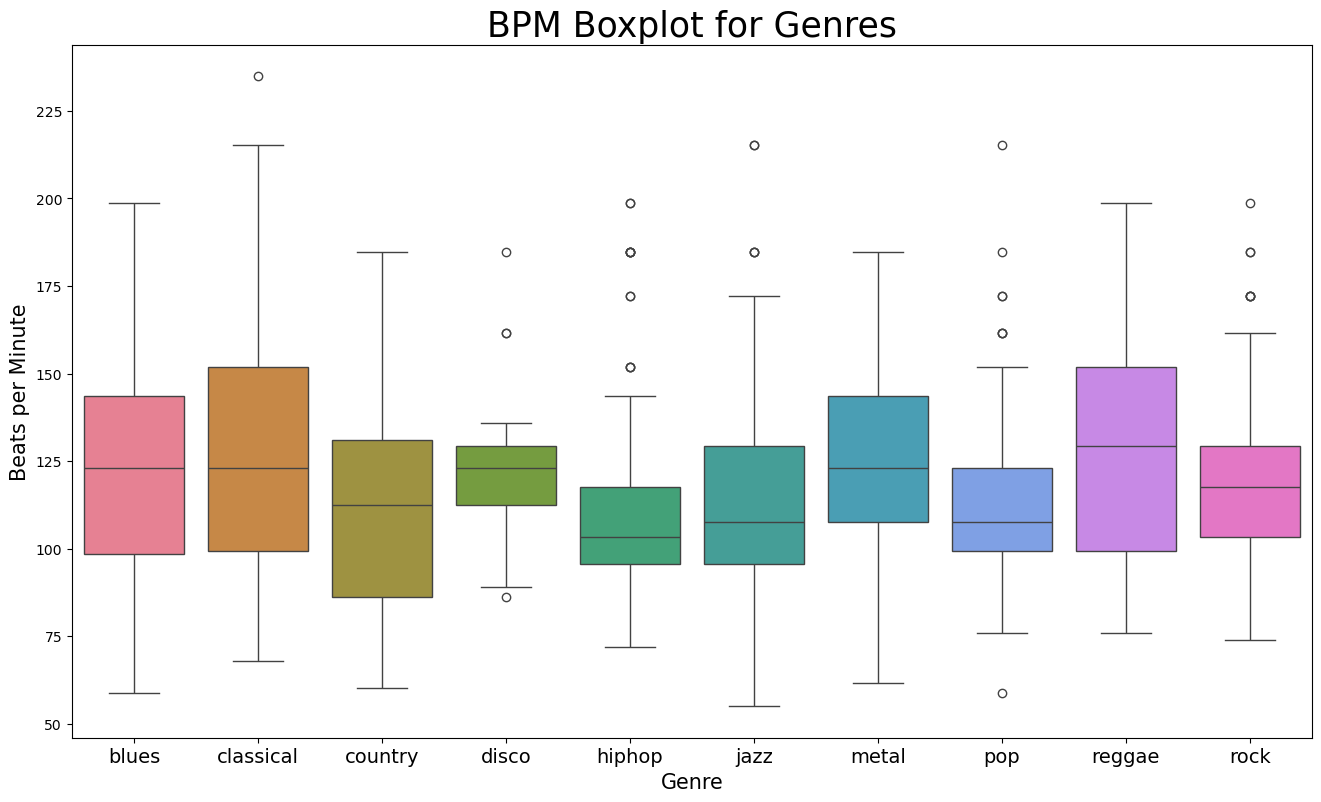

In [52]:
#Box plot for Genres Distribution
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Beats per Minute", fontsize = 15)
plt.show()

In [53]:
#Principle component analysis to visualize groups of genres
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#Normalization X
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [54]:
#Principle Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [55]:
finalDf = pd.concat([principalDf, y], axis = 1)
pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

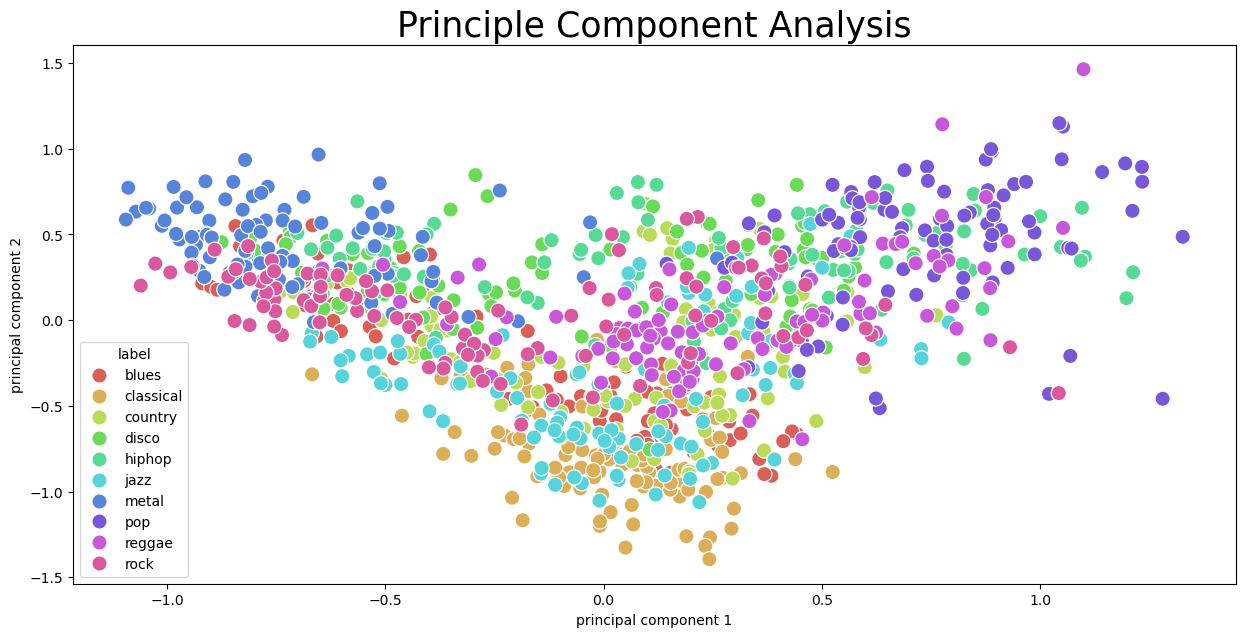

In [56]:
plt.figure(figsize=(15,7))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=finalDf,
    legend="full",
    s=120
)
plt.title('Principle Component Analysis', fontsize = 25)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [58]:
#Create Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [59]:
#Read data
data = pd.read_csv('features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [60]:
#Dependent and independent variables
y = data['label'] #dependent variable
X = data.loc[:, data.columns != 'label']#independent variable

# Drop non-numerical columns before scaling
X = X.select_dtypes(include=np.number)  # Keep only numerical features

#Normalize X
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

In [61]:
#Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [62]:
#Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predict_test = lr_model.predict(X_test)

#Accuracy
print("Logistic Regression's Accuracy is: ", accuracy_score(lr_predict_test, y_test))

Logistic Regression's Accuracy is:  0.7012012012012012


In [63]:
#KNN Model
knn_model = KNeighborsClassifier(n_neighbors=19)
knn_model.fit(X_train, y_train)
knn_predict_test = knn_model.predict(X_test)

#Accuracy
print("KNN's Accuracy is: ", accuracy_score(knn_predict_test, y_test))

Exception in thread Thread-6 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\sezgi\anaconda3\Lib\threading.py", line 1075, in _bootstrap_inner
    self.run()
  File "C:\Users\sezgi\anaconda3\Lib\threading.py", line 1012, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\sezgi\anaconda3\Lib\subprocess.py", line 1599, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\sezgi\anaconda3\Lib\encodings\cp1254.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 33: character maps to <undefined>


KNN's Accuracy is:  0.8313313313313313


  File "C:\Users\sezgi\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 262, in _count_physical_cores
    cpu_info = cpu_info.stdout.splitlines()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^


In [64]:
#Support Vector Machine Model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predict_test = svm_model.predict(X_test)

#Accuracy
print("SVM's Accuracy is: ", accuracy_score(svm_predict_test, y_test))

SVM's Accuracy is:  0.7587587587587588


In [65]:
#Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_model_predict_test = dt_model.predict(X_test)

#Accuracy
print("Decision Tree's Accuracy is: ", accuracy_score(dt_model_predict_test, y_test))

Decision Tree's Accuracy is:  0.6601601601601602


In [66]:
#Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_model_predict_test = rf_model.predict(X_test)

#Accuracy
print("Random Forest Model Accuracy is: ", accuracy_score(rf_model_predict_test, y_test))

Random Forest Model Accuracy is:  0.8738738738738738


In [67]:
#XGBoost Model
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the target variable
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test) # Use the same encoder to transform y_test

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_model_predict_test = xgb_model.predict(X_test)

#Accuracy
print("XGBoost Model Accuracy is: ", accuracy_score(xgb_model_predict_test, y_test))

XGBoost Model Accuracy is:  0.908908908908909
